# SGA-PMX Demo

Skrypt przedstawia przykładową implementację algorytmu Simple Genetic Algorithm (SGA) z operatorem PMX i jego zastosowanie do rozwiązywania problemu komiwojażera (ang. Travelling Salesman Problem, TSP). Popularne instancje problemu TSP można znaleźć w bibliotece TSPLib [1]. Skrypt skupia się na rozwiązywaniu instancji BERLIN52, w celu rozwiązywania innych instancji może okazać się konieczna zmiana ustawień parametrów algorytmu, a może też i operatorów ewolucyjnych.

Literatura:

[1] TSPLIB, http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import time

%matplotlib inline

## Input data

In [2]:
# BERLIN52

n = 52
print('Problem size: %d' % n)

coords = np.array([565.0, 575.0, 25.0, 185.0, 345.0, 750.0, 945.0, 685.0, 845.0, 655.0, 880.0, 660.0, 25.0, 230.0, 525.0, 1000.0, 580.0, 1175.0, 650.0, 1130.0, 1605.0, 620.0, 1220.0, 580.0, 1465.0, 200.0, 1530.0, 5.0, 845.0, 680.0, 725.0, 370.0, 145.0, 665.0, 415.0, 635.0, 510.0, 875.0, 560.0, 365.0, 300.0, 465.0, 520.0, 585.0, 480.0, 415.0, 835.0, 625.0, 975.0, 580.0, 1215.0, 245.0, 1320.0, 315.0, 1250.0, 400.0, 660.0, 180.0, 410.0, 250.0, 420.0, 555.0, 575.0, 665.0, 1150.0, 1160.0, 700.0, 580.0, 685.0, 595.0, 685.0, 610.0, 770.0, 610.0, 795.0, 645.0, 720.0, 635.0, 760.0, 650.0, 475.0, 960.0, 95.0, 260.0, 875.0, 920.0, 700.0, 500.0, 555.0, 815.0, 830.0, 485.0, 1170.0, 65.0, 830.0, 610.0, 605.0, 625.0, 595.0, 360.0, 1340.0, 725.0, 1740.0, 245.0])
coords = coords.reshape(n, 2)

A = np.empty((n, n))
for i in range(n):
    for j in range(n):
        A[i, j] = np.sqrt(((coords[i, :] - coords[j, :])**2).sum())
print('Distance matrix:\n', A)

p = [0, 48, 31, 44, 18, 40,  7,  8,  9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24,  3,  5, 14,  4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29,  1,  6, 41, 20, 16,  2, 17, 30, 21]
print('Optimal solution:\n', p)

Problem size: 52
Distance matrix:
 [[   0.          666.10809934  281.11385594 ...  217.08293346
   789.38267019 1220.46097848]
 [ 666.10809934    0.          649.32657423 ...  596.25917184
  1421.55724471 1716.04924172]
 [ 281.11385594  649.32657423    0.         ...  463.24939288
   995.3140208  1483.59361012]
 ...
 [ 217.08293346  596.25917184  463.24939288 ...    0.
   829.60834133 1150.76061803]
 [ 789.38267019 1421.55724471  995.3140208  ...  829.60834133
     0.          624.81997407]
 [1220.46097848 1716.04924172 1483.59361012 ... 1150.76061803
   624.81997407    0.        ]]
Optimal solution:
 [0, 48, 31, 44, 18, 40, 7, 8, 9, 42, 32, 50, 10, 51, 13, 12, 46, 25, 26, 27, 11, 24, 3, 5, 14, 4, 23, 47, 37, 36, 39, 38, 35, 34, 33, 43, 45, 15, 28, 49, 19, 22, 29, 1, 6, 41, 20, 16, 2, 17, 30, 21]


# Drawing function

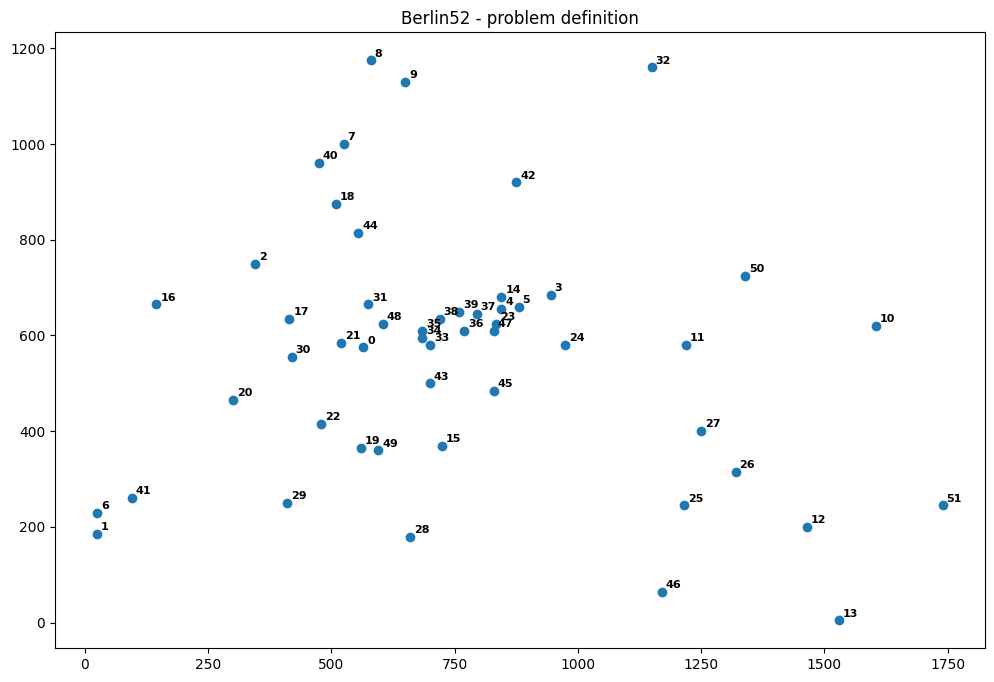

In [3]:
plt.figure(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

plt.title('Berlin52 - problem definition')

plt.show()

In [4]:
from matplotlib.lines import Line2D

#route = best_chromosome
def draw_result(route,coords):
    plt.figure(figsize=(12,8))
    fig, ax = plt.subplots(figsize=(12,8))

    plt.plot(coords[:, 0], coords[:, 1], 'o')

    for i in range(n):
        plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

    ax.add_line(Line2D(
        [coords[0, 0], coords[route[0], 0]],
        [coords[0, 1], coords[route[0], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
            (coords[0, 1] + coords[route[0], 1])/2 + 6,
            '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
    for i in range(1, len(route)):
        ax.add_line(Line2D(
            [coords[route[i-1], 0], coords[route[i], 0]],
            [coords[route[i-1], 1], coords[route[i], 1]],
            linewidth=1, color='gray'))
        plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
                (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
                '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
    ax.add_line(Line2D(
        [coords[route[-1], 0], coords[0, 0]],
        [coords[route[-1], 1], coords[0, 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
            (coords[route[-1], 1] + coords[0, 1])/2 + 6,
            '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

    plt.title('Berlin52 - pmx solution')

    plt.show()

<Figure size 1200x800 with 0 Axes>

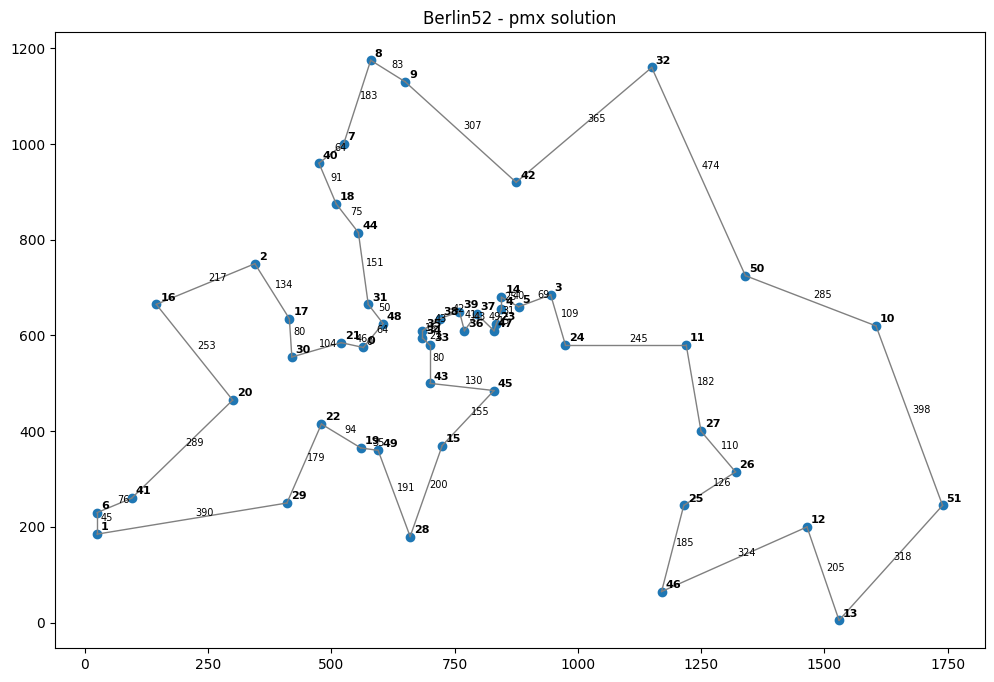

In [5]:
draw_result(p,coords)

## Objective function

In [97]:
def tsp_objective_function(p,matrix):
    s = 0.0
    for i in range(matrix.shape[0]):
        s += matrix[p[i-1], p[i]]
    return s

In [89]:
print(tsp_objective_function(p,A), p)

9181.392812819693 [25 46 15 43 33 34  0 21 30 20 41  6  1 29 28 49 19 22 17 16  2 18 40  7
  8  9 14  4 37 36 39 38 35 48 31 44 42 32 50 10 51 13 12 26 45 47 23  5
  3 24 11 27]


## Random Sampling

In [8]:
t0 = time.time()

T = 1000000

permutations = np.empty((T, n), dtype=np.int64)
costs = np.zeros(T)
for i in range(T):
    permutations[i, :] = np.random.permutation(n)
    costs[i] = tsp_objective_function(permutations[i, :])

print(time.time() - t0)

p = permutations[costs.argmin(), :]
print(tsp_objective_function(p), p)

27.21252202987671
21547.31417564973 [49  2 40 32 14 33 23  5 19 45 24 30 17 18  7 42  4 16 21 27 13 25 11  3
  9 22  6 41 26 29 31 34 48  0 35 37 20 43 36 44  8  1 12 10 51 46 38 47
 50 39 15 28]


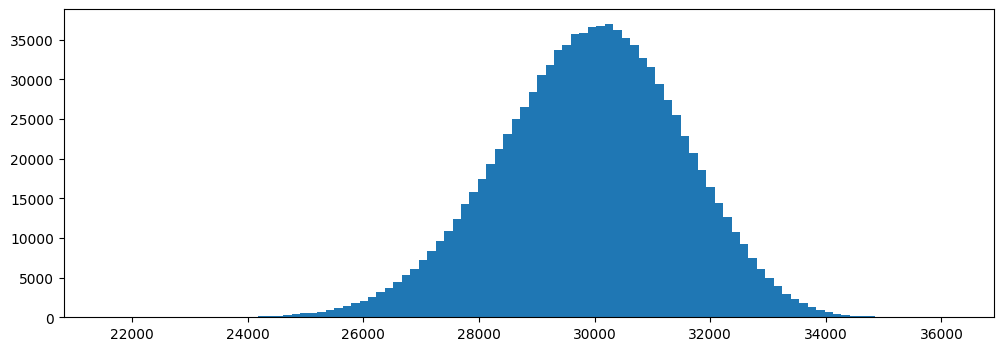

29914.31777152728 1578.755508301752


In [9]:
plt.figure(figsize=(12,4))
plt.hist(costs, bins=100)
plt.show()

print(costs.mean(), costs.std())

## Simulated Annealing

In [10]:
def random_neighbor(p, radius):
    q = p.copy()
    for r in range(radius):
        i, j = np.random.choice(n, 2, replace=False)
        q[i], q[j] = q[j], q[i]
    return q

In [11]:
T = 500000
radius = 1
alpha = 1.0

t0 = time.time()

p = np.random.permutation(n)
p_cost = tsp_objective_function(p)
costs = np.zeros(T)
for t in range(T):
    q = random_neighbor(p, radius)
    q_cost = tsp_objective_function(q)
    if(q_cost < p_cost):
        p, p_cost = q, q_cost
    elif(np.random.rand() < np.exp(- alpha * (q_cost - p_cost) * t/T)):
        p, p_cost = q, q_cost
    costs[t] = p_cost

print(time.time() - t0, costs.min())

25.388805627822876 9181.392812819693


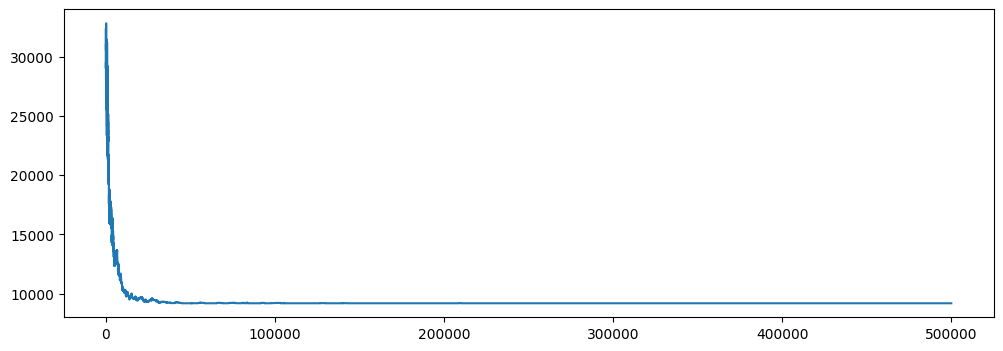

In [12]:
plt.figure(figsize=(12,4))
plt.plot(costs)
plt.show()

## SGA-PMX
### crossover functions

In [10]:
def PMX(ind1, ind2):
    gene=np.random.randint(1,len(ind1),2)
    start=min(gene)-1
    end=max(gene)

    child1=ind1.copy()
    child2=ind2.copy()
    #inverse permutation
    ordering1=np.argsort(ind1)
    ordering2=np.argsort(ind2)

    for index in range(start,end):

        found1=ordering1[ind2[index]]
        found2=ordering2[ind1[index]]
        #swap the value at index with the value of the other parent at index (found in oneself)
        child2[index],child2[found2]=child2[found2],child2[index]
        child1[index],child1[found1]=child1[found1],child1[index]
        #update the positions of elements
        ordering1[child1[index]],ordering1[child1[found1]]=ordering1[child1[found1]],ordering1[child1[index]]
        ordering2[child2[index]],ordering2[child2[found2]]=ordering2[child2[found2]],ordering2[child2[index]]
        #print(ordering1[child1[index]],ordering1[child1[ordering1[ind2[index]]]])
        #print(ordering1)
    return child1,child2

In [114]:
def copy_genes(parent,child,start,end):
    i=0
    k=0
    #not using ndenumerate here for simplicity
    if start>0:
        for n in parent:
            if n not in child:
                if i<start:
                    child[i] = n
                    i+=1
                else:
                    break
            k+=1

    #possibly should be end+1 but works    
    i=end
    if k<len(parent):
        for n in parent[k:]:
            if n not in child:
                child[i]=n
                i+=1
    return child


def OX(ind1,ind2):
    gene=np.random.randint(1,len(ind1),2)
    start=min(gene)-1
    end=max(gene)
    #print(start,end)
    child1=np.full(len(ind1),-1)
    child2=np.full(len(ind1),-1)
    child1[start:end]=ind2[start:end]
    child2[start:end]=ind1[start:end]
    copy_genes(ind1,child1,start,end)
    copy_genes(ind2,child2,start,end)
    return child1,child2


#print(OX([0,1,5,4,3,2],[4,2,3,5,1,0]))

### Mutation functions

In [69]:
import itertools

def local_search_mutation(p,k):
    best=tsp_objective_function(p)
    best_candidate=p
    for tau in itertools.combinations(range(len(p)),k):
        candidate=p.copy()
        for sigma in itertools.permutations(tau):
            # a loop here as numpy doesn't appear to like tuple tricks
            for i in range(len(tau)):
                candidate[tau[i]]=p[sigma[i]]
            #print(candidate)
            if tsp_objective_function(candidate)<best:
                best=tsp_objective_function(candidate)
                best_candidate=candidate.copy()
        #     print(sigma)
        # print(tau)
    #print('candidate found')
    return best_candidate

#local_search_mutation(np.array([0,1,5,4,3,2,6,8,7]),3)

In [9]:
def random_transpose_mutation(p):
    a = np.random.choice(len(p), 2, False)
    q=p.copy()
    q[a[0]],q[a[1]]=q[a[1]],q[a[0]]
    return q

In [8]:
def reverse_sequence_mutation(p):
    a = np.random.choice(len(p), 2, False)
    i, j = a.min(), a.max()
    q = p.copy()
    q[i:j+1] = q[i:j+1][::-1]
    return q

# SGA class

In [91]:
class SGA:
    def __init__(self,chromosome_length,mutation_function,crossover_function,
                 population_size=500,crossover_probability=0.95,mutation_probability=0.25,number_of_iterations=250,
                 extra_mutation=None,iterated=False,distance_matrix=A):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.number_of_offspring = population_size
        self.crossover_probability = crossover_probability
        self.mutation_probability = mutation_probability
        self.number_of_iterations = number_of_iterations
        self.mutation_function=mutation_function
        self.crossover_function=crossover_function
        self.extra_mutation=extra_mutation
        self.iterated=iterated
        self.distance_matrix=distance_matrix

        self.time0 = time.time()
        self.best_objective_value = np.Inf
        self.best_chromosome = np.zeros((1, chromosome_length))
        self.values=np.zeros(number_of_iterations)
    def gen_initial_population(self):
        # generating an initial population
        self.current_population = np.zeros((self.population_size, self.chromosome_length), dtype=np.int64)
        for i in range(self.population_size):
            self.current_population[i, :] = np.random.permutation(self.chromosome_length)

        # evaluating the objective function on the current population
        self.objective_values = np.zeros(self.population_size)
        for i in range(self.population_size):
            self.objective_values[i] = tsp_objective_function(self.current_population[i, :],self.distance_matrix)
    
    def fit(self):
        for t in range(self.number_of_iterations):

            # selecting the parent indices by the roulette wheel method
            fitness_values = self.objective_values.max() - self.objective_values
            if fitness_values.sum() > 0:
                fitness_values = fitness_values / fitness_values.sum()
            else:
                fitness_values = np.ones(self.population_size) / self.population_size
            parent_indices = np.random.choice(self.population_size, self.number_of_offspring, True, fitness_values).astype(np.int64)

            # creating the children population
            children_population = np.zeros((self.number_of_offspring, self.chromosome_length), dtype=np.int64)
            for i in range(int(self.number_of_offspring/2)):
                if np.random.random() < self.crossover_probability:
                    #I'm changing the copying behaviour since it isn't in place anyway, i will just create new ndarrays in the function
                    children_population[2*i, :], children_population[2*i+1, :] = self.crossover_function(self.current_population[parent_indices[2*i], :], self.current_population[parent_indices[2*i+1], :])
                else:
                    children_population[2*i, :], children_population[2*i+1, :] = self.current_population[parent_indices[2*i], :].copy(), self.current_population[parent_indices[2*i+1]].copy()
                
            if np.mod(self.number_of_offspring, 2) == 1:
                children_population[-1, :] = self.current_population[parent_indices[-1], :]
            # mutating the children population
            for i in range(self.number_of_offspring):
                if np.random.random() < self.mutation_probability:
                    children_population[i, :] = self.mutation_function(children_population[i, :])
                    if self.extra_mutation is not None:
                        proposed = self.extra_mutation(children_population[i, :],k=2)
                        iterations=1
                        if self.iterated:
                            while tsp_objective_function(proposed,self.distance_matrix)<tsp_objective_function(children_population[i, :],self.distance_matrix):
                                children_population[i, :] = proposed
                                proposed = self.extra_mutation(children_population[i, :],k=2)
                                iterations+=1
                        else:
                            children_population[i,:]=proposed
                        print(f'mutation complete in {iterations} iterations')
            # evaluating the objective function on the children population
            children_objective_values = np.zeros(self.number_of_offspring)
            for i in range(self.number_of_offspring):
                children_objective_values[i] = tsp_objective_function(children_population[i, :],self.distance_matrix)
            # replacing the current population by (Mu + Lambda) Replacement
            objective_values = np.hstack([self.objective_values, children_objective_values])
            current_population = np.vstack([self.current_population, children_population])

            I = np.argsort(objective_values)
            self.current_population = current_population[I[:self.population_size], :]
            self.objective_values = objective_values[I[:self.population_size]]
            # recording some statistics - the mistake was here!
            if self.best_objective_value > self.objective_values[0]:
                self.best_objective_value = self.objective_values[0]
                self.best_chromosome = self.current_population[0, :]
            # est value in generation
            self.values[t]=self.objective_values[0]
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - self.time0, self.objective_values.min(), self.objective_values.mean(), self.objective_values.max(), self.objective_values.std()))


# SGA experiments

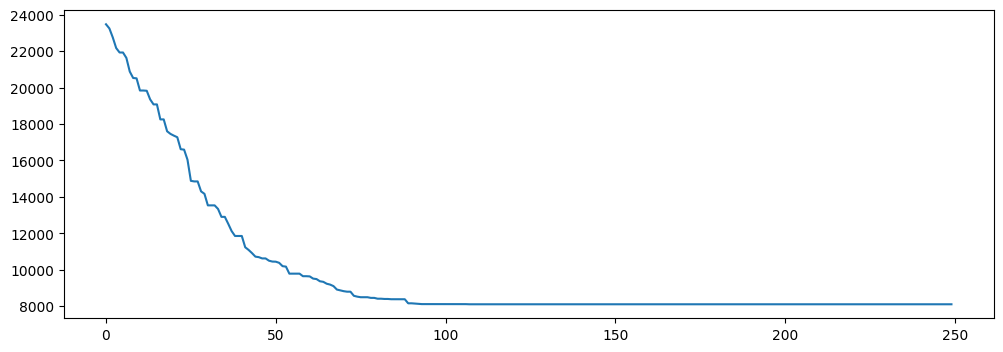

In [58]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
#default config
E1=SGA(chromosome_length=n,mutation_function=reverse_sequence_mutation,crossover_function=PMX)
E1.gen_initial_population()
E1.fit()
plt.figure(figsize=(12,4))
plt.plot(E1.values)
plt.show()

<Figure size 1200x800 with 0 Axes>

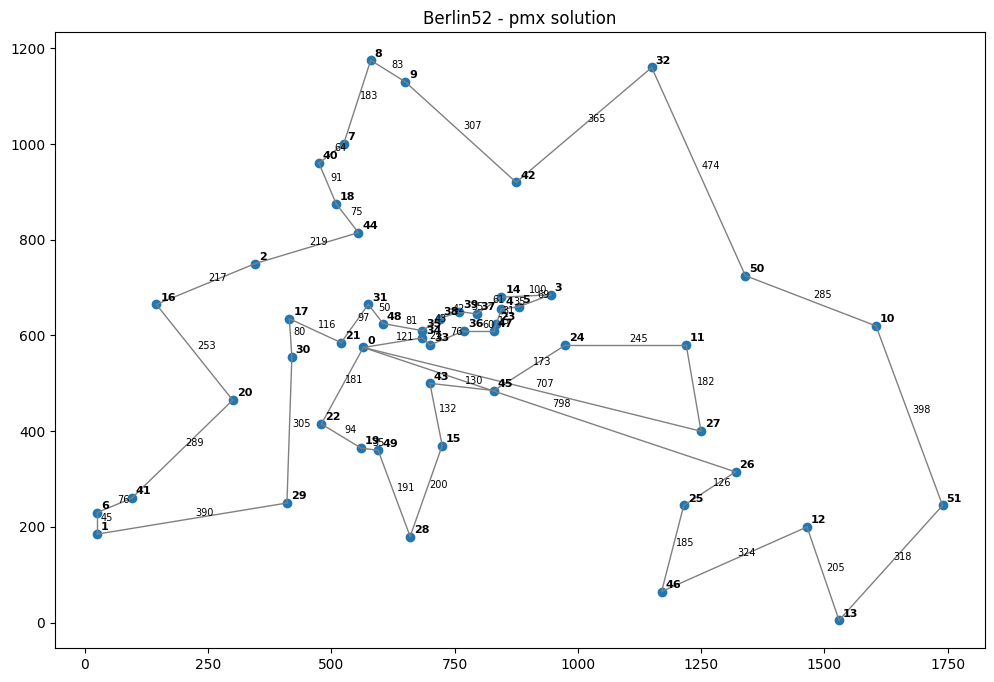

In [74]:
draw_result(E1.best_chromosome,coords)

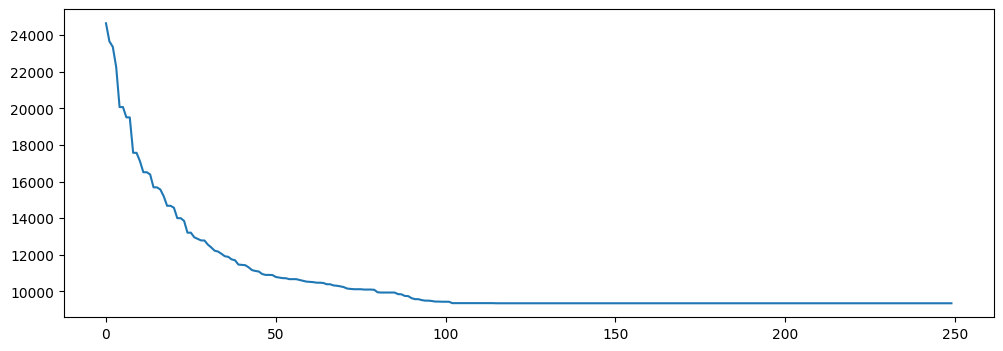

In [ ]:
#transpose mutation
E2=SGA(chromosome_length=n,mutation_function=random_transpose_mutation,crossover_function=PMX)
E2.gen_initial_population()
E2.fit()
plt.figure(figsize=(12,4))
plt.plot(E2.values)
plt.show()

<Figure size 1200x800 with 0 Axes>

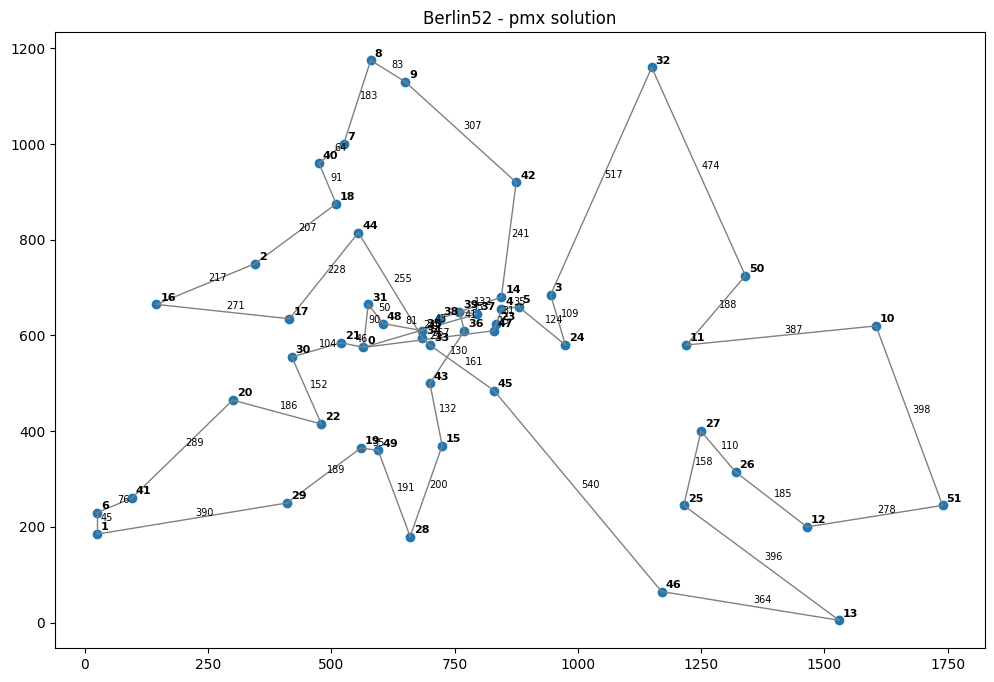

In [73]:
draw_result(E2.best_chromosome,coords)

  0     7.49967384 21602.49405663 27857.46298167 29447.46592628 1329.08402078
  1    15.84234142 20743.41017857 26043.29227353 27751.20415708 1278.88025898
  2    24.33926916 20172.19783419 24629.14196744 26070.41392065 1141.73340500
  3    30.75680685 19871.82981324 23574.40191410 24915.65460006 1062.45551921
  4    37.93562174 19094.09582014 22702.20942936 23911.75657082 932.68255186
  5    45.37233210 18315.88218684 21941.76661816 23036.78509677 875.55930661
  6    53.06557941 18315.88218684 21310.86508054 22362.71452462 799.32196799
  7    59.82307553 17610.36761678 20744.26205245 21703.50826987 765.37585884
  8    66.78759384 17544.10780189 20169.10483832 21162.38887103 741.10957767
  9    74.12572265 17319.75896473 19647.88965677 20468.62717275 672.04638516
 10    82.07757211 17319.75896473 19214.40321926 20035.77400796 618.20599617
 11    88.23565054 16193.21922178 18863.72241254 19593.14114993 596.60241210
 12    96.41291881 14888.99001759 18500.53778142 19245.68065696 625.2278

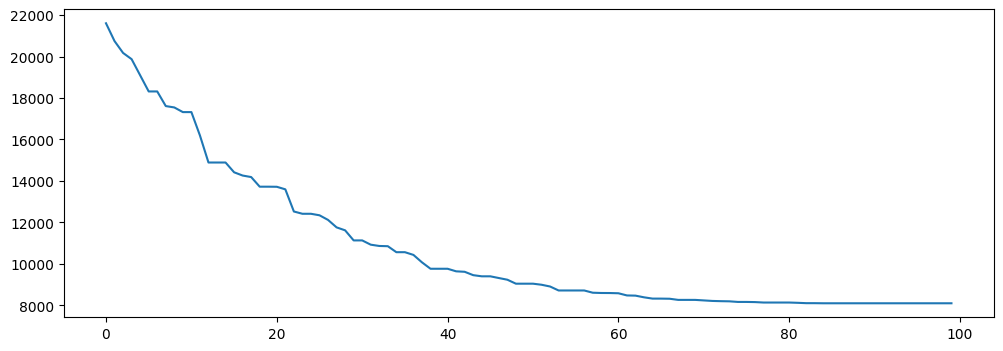

In [71]:
#local search mutation (k=2) for time's sake
E3=SGA(chromosome_length=n,mutation_function=reverse_sequence_mutation,crossover_function=PMX,number_of_iterations=100,extra_mutation=local_search_mutation)
E3.gen_initial_population()
E3.fit()
plt.figure(figsize=(12,4))
plt.plot(E3.values)
plt.show()

<Figure size 1200x800 with 0 Axes>

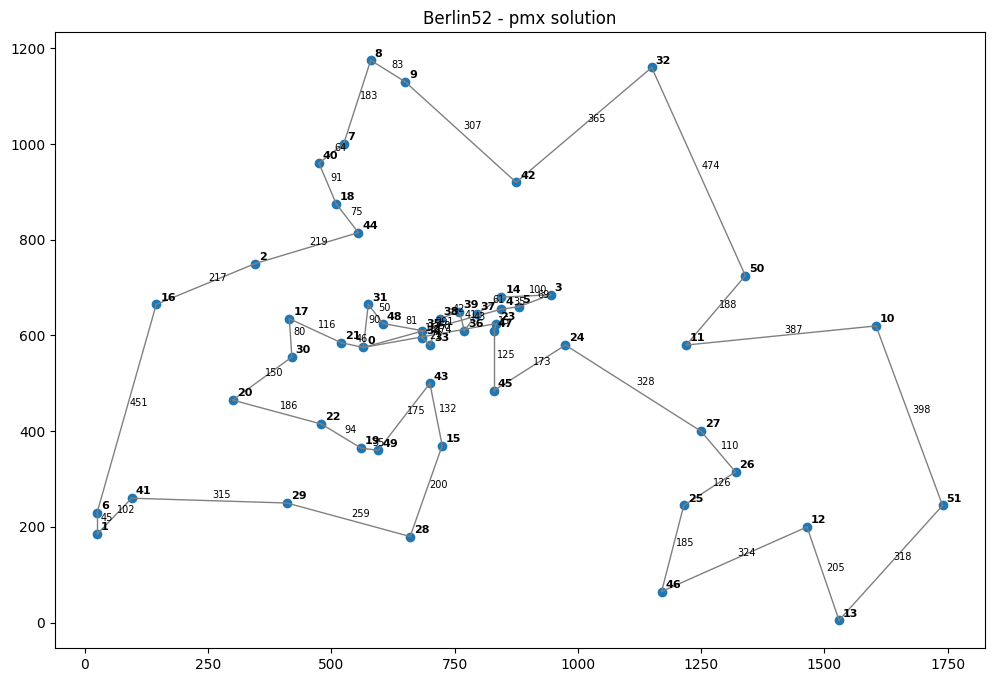

In [72]:
draw_result(E3.best_chromosome,coords)

mutation complete in 48 iterations
mutation complete in 49 iterations
mutation complete in 44 iterations
mutation complete in 44 iterations
mutation complete in 47 iterations
mutation complete in 53 iterations
mutation complete in 50 iterations
mutation complete in 37 iterations
mutation complete in 38 iterations
mutation complete in 48 iterations
mutation complete in 50 iterations
mutation complete in 55 iterations
mutation complete in 54 iterations
mutation complete in 44 iterations
mutation complete in 40 iterations
mutation complete in 51 iterations
mutation complete in 53 iterations
mutation complete in 56 iterations
mutation complete in 57 iterations
mutation complete in 56 iterations
mutation complete in 61 iterations
mutation complete in 44 iterations
mutation complete in 53 iterations
mutation complete in 62 iterations
  0    72.60919142 9648.24696323 24094.35944759 29633.81235160 7721.20395501
mutation complete in 30 iterations
mutation complete in 7 iterations
mutation compl

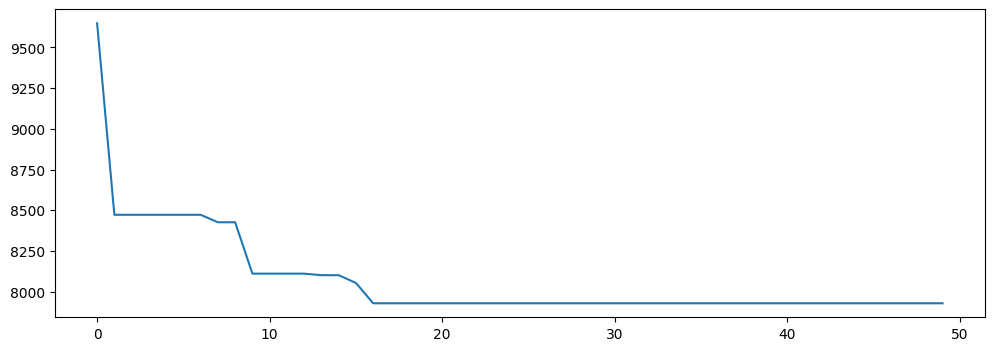

In [81]:
E4=SGA(chromosome_length=n,mutation_function=reverse_sequence_mutation,crossover_function=PMX,
       population_size=100,number_of_iterations=50,extra_mutation=local_search_mutation,iterated=True)
E4.gen_initial_population()
E4.fit()
plt.figure(figsize=(12,4))
plt.plot(E4.values)
plt.show()

<Figure size 1200x800 with 0 Axes>

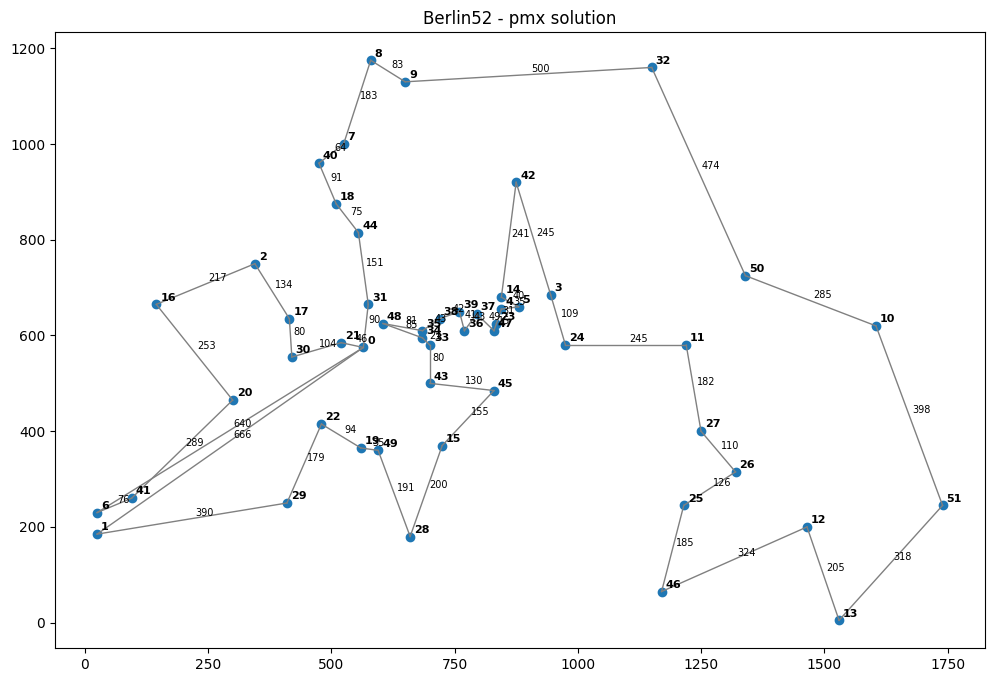

In [82]:
draw_result(E4.best_chromosome,coords)

#### Ordered crossover

  0     0.18200636 24268.26847639 28288.43897016 29663.80283203 1005.68006049
  1     0.34271836 22883.34416942 27206.13813625 28282.39710644 810.55182506
  2     0.60545778 22883.34416942 26360.48204455 27310.58344019 795.02967714
  3     0.82600093 22600.11276311 25544.92452429 26483.59499295 799.81512523
  4     1.05071092 21773.05095010 24747.47356247 25748.38139389 773.66362285
  5     1.22686195 20835.11021797 24007.29311031 24905.91070414 735.38491486
  6     1.38448310 20734.49798240 23360.67315452 24224.07075987 690.15769261
  7     1.51429152 20734.49798240 22723.96714881 23562.58767756 593.77393308
  8     1.64621472 19152.47898032 22263.27734839 22929.08845090 547.11437138
  9     1.80253172 18974.86237193 21748.14570076 22449.21204800 626.88276582
 10     1.95164466 18018.58582194 21220.22988597 21976.20871815 651.37427843
 11     2.07771516 17654.45274655 20732.70392692 21499.03194393 670.73358060
 12     2.22584367 17654.45274655 20109.27938122 20940.52700487 704.3742852

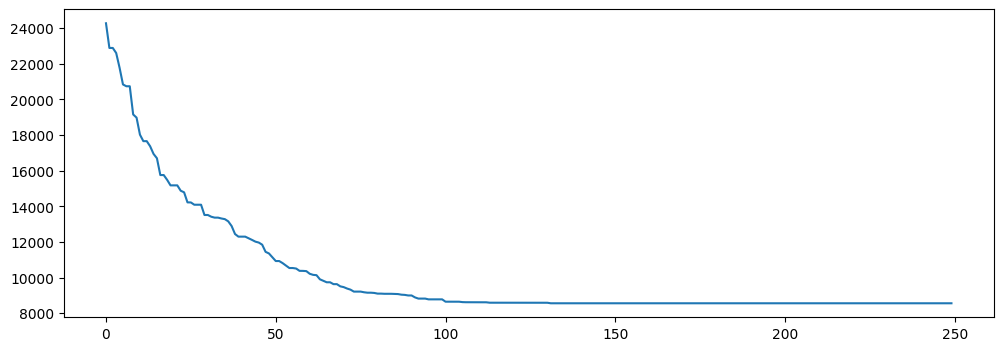

In [115]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
#default config
E5=SGA(chromosome_length=n,mutation_function=reverse_sequence_mutation,crossover_function=OX)
E5.gen_initial_population()
E5.fit()
plt.figure(figsize=(12,4))
plt.plot(E5.values)
plt.show()

<Figure size 1200x800 with 0 Axes>

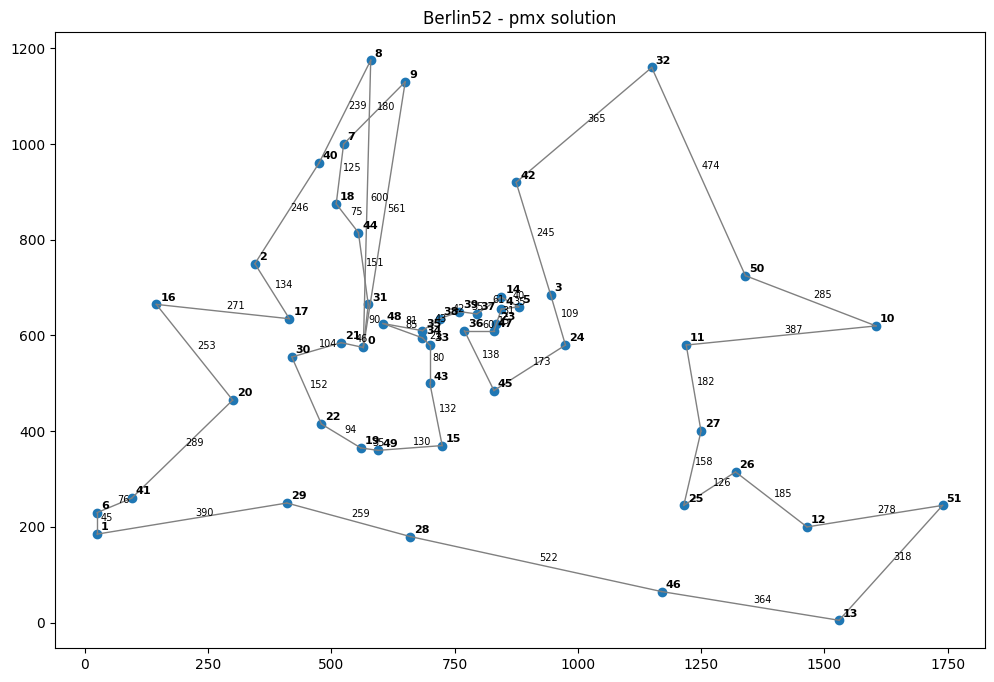

In [116]:
draw_result(E5.best_chromosome,coords)

### Other instances

In [ ]:
def tsp_variant_objective(p,matrix):
    s = 0.0
    for i in range(n):
        s += matrix[p[i-1], p[i]]
    return s

In [42]:
import gzip
def read_problem(name):
    with gzip.open(name+'.tsp.gz', 'rb') as f:
        file_content = f.read()
        print(file_content)

read_problem('bayg29')        

b'NAME: bayg29\nTYPE: TSP\nCOMMENT: 29 Cities in Bavaria, geographical distances (Groetschel,Juenger,Reinelt)\nDIMENSION: 29\nEDGE_WEIGHT_TYPE: EXPLICIT\nEDGE_WEIGHT_FORMAT: UPPER_ROW \nDISPLAY_DATA_TYPE: TWOD_DISPLAY\nEDGE_WEIGHT_SECTION\n 97 205 139  86  60 220  65 111 115 227  95  82 225 168 103 266 205 149 120  58 257 152  52 180 136  82  34 145\n129 103  71 105 258 154 112  65 204 150  87 176 137 142 204 148 148  49  41 211 226 116 197  89 153 124  74\n219 125 175 386 269 134 184 313 201 215 267 248 271 274 236 272 160 151 300 350 239 322  78 276 220  60\n167 182 180 162 208  39 102 227  60  86  34  96 129  69  58  60 120 119 192 114 110 192 136 173 173\n 51 296 150  42 131 268  88 131 245 201 175 275 218 202 119  50 281 238 131 244  51 166  95  69\n279 114  56 150 278  46 133 266 214 162 302 242 203 146  67 300 205 111 238  98 139  52 120\n178 328 206 147 308 172 203 165 121 251 216 122 231 249 209 111 169  72 338 144 237 331\n169 151 227 133 104 242 182  84 290 230 146 165 121 2

In [ ]:
from python_tsp.distances import tsplib_distance_matrix

tsplib_file = "kroA100.tsp"  # replace with the path to your TSPLIB file
distance_matrix = tsplib_distance_matrix(tsplib_file)


[[   0 1693 2252 ...  783 1468 2643]
 [1693    0 1708 ... 1911 3156 1831]
 [2252 1708    0 ... 1786 3315  454]
 ...
 [ 783 1911 1786 ...    0 1535 2228]
 [1468 3156 3315 ... 1535    0 3760]
 [2643 1831  454 ... 2228 3760    0]]
  0     0.13561463 73633.00000000 83657.62200000 88453.00000000 3368.16668221
  1     0.20774698 66147.00000000 80015.64600000 83791.00000000 2877.21501398
  2     0.29345083 63095.00000000 77220.03400000 80664.00000000 2855.17114248
  3     0.41655231 63095.00000000 74424.69000000 77946.00000000 3043.37965721
  4     0.51573491 60178.00000000 71755.68600000 75506.00000000 3048.24206116
  5     0.59098792 57344.00000000 69095.90400000 72851.00000000 2828.24653501
  6     0.67376113 55978.00000000 66995.06000000 70392.00000000 2775.40029264
  7     0.74486113 55972.00000000 65043.50000000 68342.00000000 2615.42971574
  8     0.80794597 53699.00000000 63228.47400000 66206.00000000 2432.48941402
  9     0.87005067 53699.00000000 61738.27200000 64610.00000000 2203.8

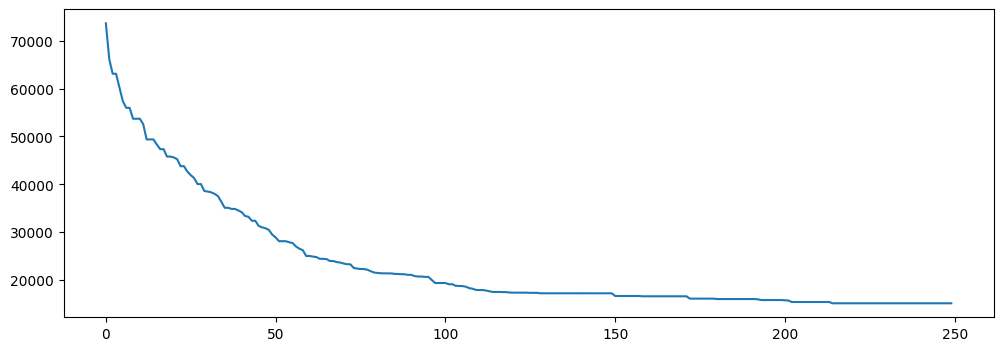

In [92]:
print(distance_matrix)
A100=SGA(chromosome_length=distance_matrix.shape[0],mutation_function=reverse_sequence_mutation,crossover_function=PMX,
         distance_matrix=distance_matrix)
A100.gen_initial_population()
A100.fit()
plt.figure(figsize=(12,4))
plt.plot(A100.values)
plt.show()

In [99]:
a100opt=np.loadtxt('a100opt.txt',dtype=int)
print(a100opt)
print(a100opt.shape)
print(tsp_objective_function(a100opt-1,distance_matrix))

[  1  47  93  28  67  58  61  51  87  25  81  69  64  40  54   2  44  50
  73  68  85  82  95  13  76  33  37   5  52  78  96  39  30  48 100  41
  71  14   3  43  46  29  34  83  55   7   9  57  20  12  27  86  35  62
  60  77  23  98  91  45  32  11  15  17  59  74  21  72  10  84  36  99
  38  24  18  79  53  88  16  94  22  70  66  26  65   4  97  56  80  31
  89  42   8  92  75  19  90  49   6  63]
(100,)
21282.0


  0     0.08696032 3349.00000000 4406.90400000 4681.00000000 212.37774550
  1     0.12766123 3211.00000000 4178.79200000 4431.00000000 206.52866323
  2     0.16655469 3211.00000000 3991.19200000 4230.00000000 207.34585392
  3     0.20533657 3211.00000000 3799.22000000 4042.00000000 182.46259781
  4     0.23676085 3145.00000000 3653.30200000 3872.00000000 153.16986256
  5     0.27324128 3018.00000000 3534.60000000 3709.00000000 137.81549985
  6     0.30572820 2908.00000000 3439.79200000 3599.00000000 119.37604758
  7     0.34881759 2880.00000000 3351.85200000 3486.00000000 110.79230161
  8     0.39489222 2839.00000000 3274.13400000 3401.00000000 111.03186950
  9     0.43730116 2818.00000000 3189.53000000 3330.00000000 114.28466695
 10     0.48088765 2717.00000000 3115.38800000 3256.00000000 109.40742871
 11     0.52166438 2654.00000000 3038.48400000 3174.00000000 100.10695153
 12     0.57202196 2654.00000000 2969.10200000 3090.00000000  85.89314056
 13     0.62470961 2604.00000000 2901.

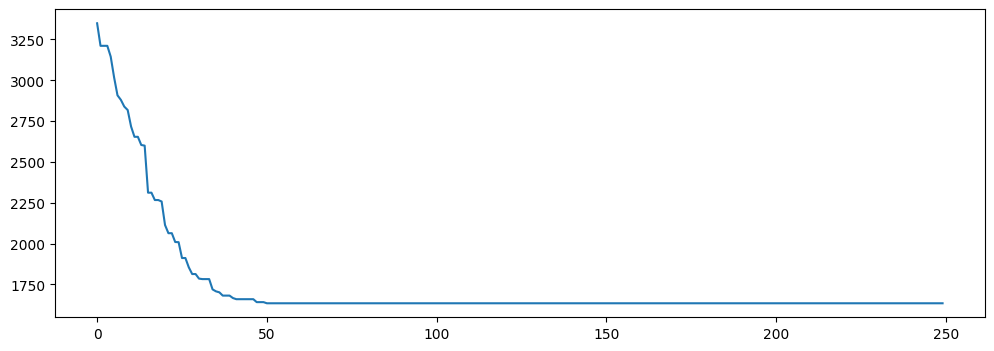

1610.0


In [100]:
tsplib_file = "bayg29.tsp"  # replace with the path to your TSPLIB file
distance_matrix = tsplib_distance_matrix(tsplib_file)
BAYG29=SGA(chromosome_length=distance_matrix.shape[0],mutation_function=reverse_sequence_mutation,crossover_function=PMX,
         distance_matrix=distance_matrix)
BAYG29.gen_initial_population()
BAYG29.fit()
plt.figure(figsize=(12,4))
plt.plot(BAYG29.values)
plt.show()
bayg29opt=np.loadtxt('bayg29opt.txt',dtype=int)
print(tsp_objective_function(bayg29opt-1,distance_matrix))

  0     0.09977841 4561.00000000 5570.13800000 5922.00000000 267.76532067
  1     0.13202858 4224.00000000 5294.31200000 5582.00000000 237.23113340
  2     0.15930581 4224.00000000 5084.80600000 5353.00000000 209.69948108
  3     0.18715572 4139.00000000 4918.96400000 5160.00000000 198.24118317
  4     0.21709347 4048.00000000 4775.69400000 5000.00000000 187.48852862
  5     0.24928117 3735.00000000 4666.75000000 4880.00000000 184.05273022
  6     0.27810121 3735.00000000 4561.99400000 4768.00000000 174.13748007
  7     0.30720067 3613.00000000 4446.73800000 4652.00000000 178.10926241
  8     0.35507464 3613.00000000 4351.90600000 4565.00000000 181.47518057
  9     0.40343595 3548.00000000 4241.09000000 4456.00000000 180.29474174
 10     0.45390391 3387.00000000 4147.36000000 4365.00000000 181.15457046
 11     0.50106573 3354.00000000 4022.02400000 4248.00000000 183.49176391
 12     0.54950166 3336.00000000 3909.16400000 4140.00000000 177.07207884
 13     0.61088204 3228.00000000 3807.

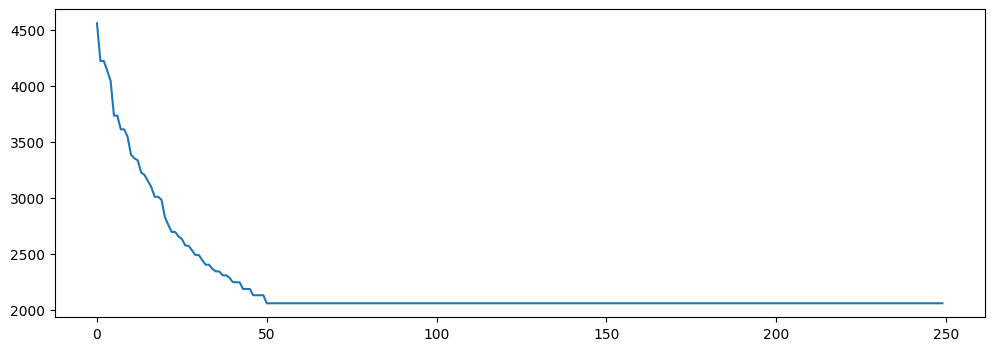

2020.0


In [101]:
tsplib_file = "bays29.tsp"  # replace with the path to your TSPLIB file
distance_matrix = tsplib_distance_matrix(tsplib_file)
BAYS29=SGA(chromosome_length=distance_matrix.shape[0],mutation_function=reverse_sequence_mutation,crossover_function=PMX,
         distance_matrix=distance_matrix)
BAYS29.gen_initial_population()
BAYS29.fit()
plt.figure(figsize=(12,4))
plt.plot(BAYS29.values)
plt.show()
bayg29opt=np.loadtxt('bays29opt.txt',dtype=int)
print(tsp_objective_function(bayg29opt-1,distance_matrix))

  0     0.17764044 224673.00000000 247977.35000000 255778.00000000 5924.34158768
  1     0.29611588 218057.00000000 241729.41800000 248100.00000000 4943.64482414
  2     0.39911795 218057.00000000 236878.61800000 242822.00000000 4744.88467595
  3     0.55608511 212922.00000000 232651.05800000 238018.00000000 4298.87115772
  4     0.68728137 211994.00000000 229235.73200000 234232.00000000 3987.36395682
  5     0.80392218 211623.00000000 226133.90000000 230809.00000000 3934.64579880
  6     0.90580273 203398.00000000 223219.74800000 228033.00000000 4088.35558880
  7     1.02415538 202414.00000000 220257.77400000 225269.00000000 4065.75781951
  8     1.11621618 199001.00000000 217332.32000000 222254.00000000 4009.47540678
  9     1.22995877 199001.00000000 214791.57200000 219485.00000000 3979.25435237
 10     1.33152747 191599.00000000 212393.47600000 217073.00000000 4029.43867622
 11     1.44169450 191599.00000000 209606.48800000 214236.00000000 4043.93058519
 12     1.53984714 190704.00

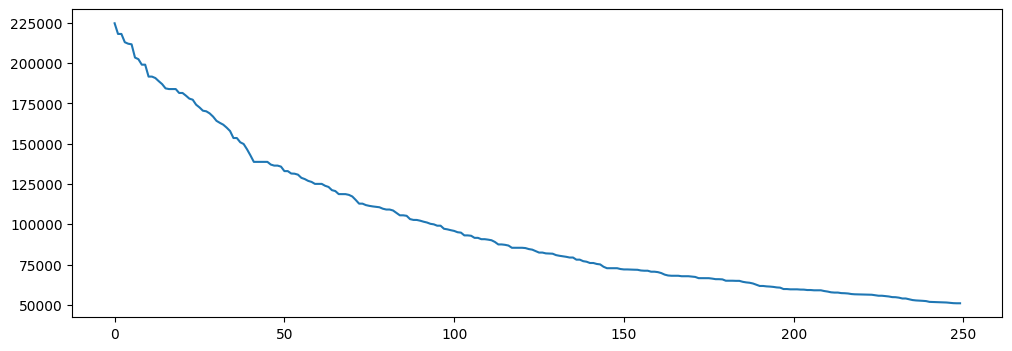

In [102]:
tsplib_file = "kroA150.tsp"  # replace with the path to your TSPLIB file
distance_matrix = tsplib_distance_matrix(tsplib_file)
A150=SGA(chromosome_length=distance_matrix.shape[0],mutation_function=reverse_sequence_mutation,crossover_function=PMX,
         distance_matrix=distance_matrix)
A150.gen_initial_population()
A150.fit()
plt.figure(figsize=(12,4))
plt.plot(A150.values)
plt.show()

  0     0.21213794 298037.00000000 329238.72000000 338184.00000000 6942.31930306
  1     0.33943081 292022.00000000 321669.81600000 329778.00000000 6587.37115534
  2     0.48424673 289099.00000000 315351.96800000 322990.00000000 5935.49196166
  3     0.62388587 280725.00000000 309679.29600000 316691.00000000 5979.82688917
  4     0.75424743 280725.00000000 304448.78400000 311389.00000000 5830.68447966
  5     0.87678099 280483.00000000 299579.01200000 306410.00000000 5518.74442857
  6     0.99579716 279211.00000000 295105.22600000 301462.00000000 4771.22936264
  7     1.12035871 273581.00000000 290847.13400000 296565.00000000 4269.16912713
  8     1.24558854 271726.00000000 287298.29800000 292118.00000000 4246.32290072
  9     1.37155128 270462.00000000 283601.15200000 288906.00000000 4048.28944233
 10     1.50206447 258757.00000000 280433.63200000 285075.00000000 4050.73411082
 11     1.62302470 258325.00000000 277224.79400000 282229.00000000 4329.57034353
 12     1.75898504 256169.00

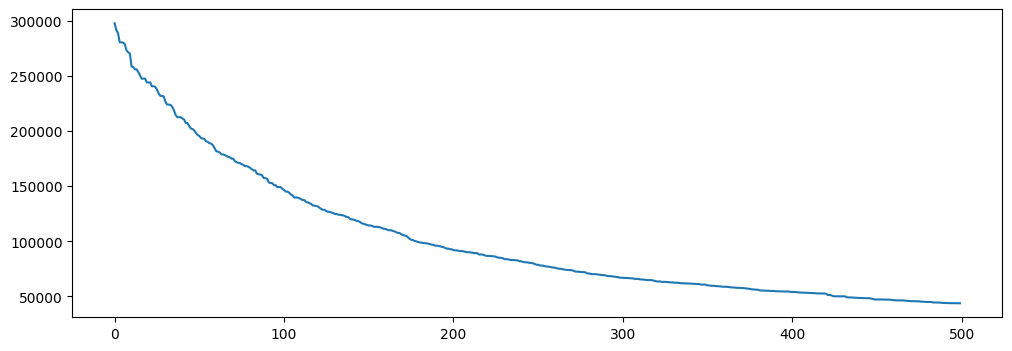

In [104]:
tsplib_file = "kroA200.tsp"  # replace with the path to your TSPLIB file
distance_matrix = tsplib_distance_matrix(tsplib_file)
A200=SGA(chromosome_length=distance_matrix.shape[0],mutation_function=reverse_sequence_mutation,crossover_function=PMX,
         distance_matrix=distance_matrix,number_of_iterations=500)
A200.gen_initial_population()
A200.fit()
plt.figure(figsize=(12,4))
plt.plot(A200.values)
plt.show()

# QAP

In [16]:
import urllib.request
import matplotlib.pyplot as plt
import time
import numpy as np

QAP_INSTANCE_URL = 'https://qaplib.mgi.polymtl.ca/data.d/nug12.dat'

In [ ]:


def read_params(url):
    qap_instance_file = urllib.request.urlopen(url)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Problem size: %d' % n)
    A = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        print(f'line {i}')
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Distance matrix:\n', B)
    return n,A,B

In [5]:
def qap_objective_function(p,flow,distances):
    s = 0.0
    for i in range(n):
        s += (flow[i, :] * distances[p[i], p]).sum()
    return s

In [6]:
class SGA_QAP:
    def __init__(self,chromosome_length,mutation_function,crossover_function,
                 population_size=500,crossover_probability=0.95,mutation_probability=0.25,number_of_iterations=250,
                 extra_mutation=None,iterated=False,distance_matrix=A,flowmatrix=B):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.number_of_offspring = population_size
        self.crossover_probability = crossover_probability
        self.mutation_probability = mutation_probability
        self.number_of_iterations = number_of_iterations
        self.mutation_function=mutation_function
        self.crossover_function=crossover_function
        self.extra_mutation=extra_mutation
        self.iterated=iterated
        self.distance_matrix=distance_matrix
        self.flow_matrix=flowmatrix

        self.time0 = time.time()
        self.best_objective_value = np.inf
        self.best_chromosome = np.zeros((1, chromosome_length))
        self.values=np.zeros(number_of_iterations)
    def gen_initial_population(self):
        # generating an initial population
        self.current_population = np.zeros((self.population_size, self.chromosome_length), dtype=np.int64)
        for i in range(self.population_size):
            self.current_population[i, :] = np.random.permutation(self.chromosome_length)

        # evaluating the objective function on the current population
        self.objective_values = np.zeros(self.population_size)
        for i in range(self.population_size):
            self.objective_values[i] = qap_objective_function(self.current_population[i, :],self.flow_matrix,self.distance_matrix)
    
    def fit(self):
        for t in range(self.number_of_iterations):

            # selecting the parent indices by the roulette wheel method
            fitness_values = self.objective_values.max() - self.objective_values
            if fitness_values.sum() > 0:
                fitness_values = fitness_values / fitness_values.sum()
            else:
                fitness_values = np.ones(self.population_size) / self.population_size
            parent_indices = np.random.choice(self.population_size, self.number_of_offspring, True, fitness_values).astype(np.int64)

            # creating the children population
            children_population = np.zeros((self.number_of_offspring, self.chromosome_length), dtype=np.int64)
            for i in range(int(self.number_of_offspring/2)):
                if np.random.random() < self.crossover_probability:
                    #I'm changing the copying behaviour since it isn't in place anyway, i will just create new ndarrays in the function
                    children_population[2*i, :], children_population[2*i+1, :] = self.crossover_function(self.current_population[parent_indices[2*i], :], self.current_population[parent_indices[2*i+1], :])
                else:
                    children_population[2*i, :], children_population[2*i+1, :] = self.current_population[parent_indices[2*i], :].copy(), self.current_population[parent_indices[2*i+1]].copy()
                
            if np.mod(self.number_of_offspring, 2) == 1:
                children_population[-1, :] = self.current_population[parent_indices[-1], :]
            # mutating the children population
            for i in range(self.number_of_offspring):
                if np.random.random() < self.mutation_probability:
                    children_population[i, :] = self.mutation_function(children_population[i, :])
                    if self.extra_mutation is not None:
                        proposed = self.extra_mutation(children_population[i, :],k=2)
                        iterations=1
                        if self.iterated:
                            while qap_objective_function(proposed,self.flow_matrix,self.distance_matrix)<qap_objective_function(children_population[i, :],self.flow_matrix,self.distance_matrix):
                                children_population[i, :] = proposed
                                proposed = self.extra_mutation(children_population[i, :],k=2)
                                iterations+=1
                        else:
                            children_population[i,:]=proposed
                        print(f'mutation complete in {iterations} iterations')
            # evaluating the objective function on the children population
            children_objective_values = np.zeros(self.number_of_offspring)
            for i in range(self.number_of_offspring):
                children_objective_values[i] = qap_objective_function(children_population[i, :],self.flow_matrix,self.distance_matrix)
            # replacing the current population by (Mu + Lambda) Replacement
            objective_values = np.hstack([self.objective_values, children_objective_values])
            current_population = np.vstack([self.current_population, children_population])

            I = np.argsort(objective_values)
            self.current_population = current_population[I[:self.population_size], :]
            self.objective_values = objective_values[I[:self.population_size]]
            # recording some statistics - the mistake was here!
            if self.best_objective_value > self.objective_values[0]:
                self.best_objective_value = self.objective_values[0]
                self.best_chromosome = self.current_population[0, :]
            # est value in generation
            self.values[t]=self.objective_values[0]
            print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - self.time0, self.objective_values.min(), self.objective_values.mean(), self.objective_values.max(), self.objective_values.std()))


In [17]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250
#default config
n,A,B=read_params(QAP_INSTANCE_URL)
Q1=SGA_QAP(chromosome_length=n,mutation_function=reverse_sequence_mutation,crossover_function=PMX,distance_matrix=B,flowmatrix=A)
Q1.gen_initial_population()
Q1.fit()


Problem size: 12
Flow matrix:
 [[0. 1. 2. 3. 1. 2. 3. 4. 2. 3. 4. 5.]
 [1. 0. 1. 2. 2. 1. 2. 3. 3. 2. 3. 4.]
 [2. 1. 0. 1. 3. 2. 1. 2. 4. 3. 2. 3.]
 [3. 2. 1. 0. 4. 3. 2. 1. 5. 4. 3. 2.]
 [1. 2. 3. 4. 0. 1. 2. 3. 1. 2. 3. 4.]
 [2. 1. 2. 3. 1. 0. 1. 2. 2. 1. 2. 3.]
 [3. 2. 1. 2. 2. 1. 0. 1. 3. 2. 1. 2.]
 [4. 3. 2. 1. 3. 2. 1. 0. 4. 3. 2. 1.]
 [2. 3. 4. 5. 1. 2. 3. 4. 0. 1. 2. 3.]
 [3. 2. 3. 4. 2. 1. 2. 3. 1. 0. 1. 2.]
 [4. 3. 2. 3. 3. 2. 1. 2. 2. 1. 0. 1.]
 [5. 4. 3. 2. 4. 3. 2. 1. 3. 2. 1. 0.]]
Distance matrix:
 [[ 0.  5.  2.  4.  1.  0.  0.  6.  2.  1.  1.  1.]
 [ 5.  0.  3.  0.  2.  2.  2.  0.  4.  5.  0.  0.]
 [ 2.  3.  0.  0.  0.  0.  0.  5.  5.  2.  2.  2.]
 [ 4.  0.  0.  0.  5.  2.  2. 10.  0.  0.  5.  5.]
 [ 1.  2.  0.  5.  0. 10.  0.  0.  0.  5.  1.  1.]
 [ 0.  2.  0.  2. 10.  0.  5.  1.  1.  5.  4.  0.]
 [ 0.  2.  0.  2.  0.  5.  0. 10.  5.  2.  3.  3.]
 [ 6.  0.  5. 10.  0.  1. 10.  0.  0.  0.  5.  0.]
 [ 2.  4.  5.  0.  0.  1.  5.  0.  0.  0. 10. 10.]
 [ 1.  5.  2.  0.  5.  

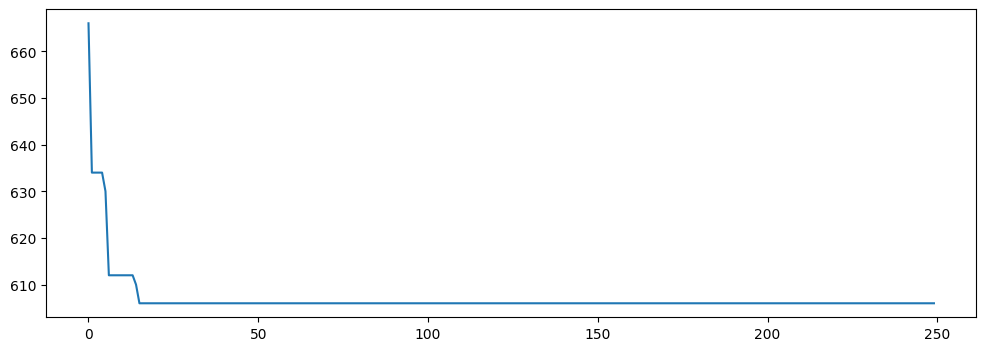

In [12]:
plt.figure(figsize=(12,4))
plt.plot(Q1.values)
plt.show()

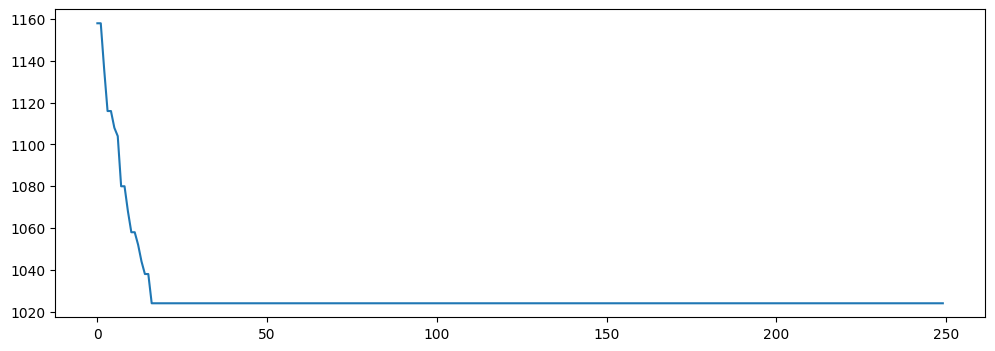

In [19]:
plt.figure(figsize=(12,4))
plt.plot(Q1.values)
plt.show()

In [24]:
QAP_INSTANCE_URL = 'https://qaplib.mgi.polymtl.ca/data.d/nug14.dat'
n,A,B=read_params(QAP_INSTANCE_URL)
Q1=SGA_QAP(chromosome_length=n,mutation_function=reverse_sequence_mutation,crossover_function=PMX,distance_matrix=B,flowmatrix=A)
Q1.gen_initial_population()
Q1.fit()

Problem size: 14
Flow matrix:
 [[0. 1. 2. 3. 4. 1. 2. 3. 4. 5. 2. 3. 4. 5.]
 [1. 0. 1. 2. 3. 2. 1. 2. 3. 4. 3. 2. 3. 4.]
 [2. 1. 0. 1. 2. 3. 2. 1. 2. 3. 4. 3. 2. 3.]
 [3. 2. 1. 0. 1. 4. 3. 2. 1. 2. 5. 4. 3. 2.]
 [4. 3. 2. 1. 0. 5. 4. 3. 2. 1. 6. 5. 4. 3.]
 [1. 2. 3. 4. 5. 0. 1. 2. 3. 4. 1. 2. 3. 4.]
 [2. 1. 2. 3. 4. 1. 0. 1. 2. 3. 2. 1. 2. 3.]
 [3. 2. 1. 2. 3. 2. 1. 0. 1. 2. 3. 2. 1. 2.]
 [4. 3. 2. 1. 2. 3. 2. 1. 0. 1. 4. 3. 2. 1.]
 [5. 4. 3. 2. 1. 4. 3. 2. 1. 0. 5. 4. 3. 2.]
 [2. 3. 4. 5. 6. 1. 2. 3. 4. 5. 0. 1. 2. 3.]
 [3. 2. 3. 4. 5. 2. 1. 2. 3. 4. 1. 0. 1. 2.]
 [4. 3. 2. 3. 4. 3. 2. 1. 2. 3. 2. 1. 0. 1.]
 [5. 4. 3. 2. 3. 4. 3. 2. 1. 2. 3. 2. 1. 0.]]
line 0
line 1
line 2
line 3
line 4
line 5
line 6
line 7
line 8
line 9
line 10
line 11
line 12
line 13
Distance matrix:
 [[ 0. 10.  0.  5.  1.  0.  1.  2.  2.  2.  2.  0.  4.  0.]
 [10.  0.  1.  3.  2.  2.  2.  3.  2.  0.  2.  0. 10.  5.]
 [ 0.  1.  0. 10.  2.  0.  2.  5.  4.  5.  2.  2.  5.  5.]
 [ 5.  3. 10.  0.  1.  1.  5.  0.  0.  2.

In [27]:

def read_params_tai(url):
    qap_instance_file = urllib.request.urlopen(url)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Problem size: %d' % n)
    A = np.empty((n, n))
    #qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Flow matrix:\n', A)

    B = np.empty((n, n))
    #qap_instance_file.readline()
    for i in range(n):
        print(f'line {i}')
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Distance matrix:\n', B)
    return n,A,B


QAP_INSTANCE_URL = 'https://qaplib.mgi.polymtl.ca/data.d/tai50a.dat'
n,A,B=read_params_tai(QAP_INSTANCE_URL)
Q2=SGA_QAP(chromosome_length=n,mutation_function=reverse_sequence_mutation,crossover_function=PMX,distance_matrix=B,flowmatrix=A)
Q2.gen_initial_population()
Q2.fit()

Problem size: 50
Flow matrix:
 [[ 0. 21. 95. ... 11. 29. 82.]
 [21.  0. 82. ... 83. 96. 74.]
 [95. 82.  0. ... 89. 48. 14.]
 ...
 [11. 83. 89. ...  0. 94. 53.]
 [29. 96. 48. ... 94.  0.  6.]
 [82. 74. 14. ... 53.  6.  0.]]
line 0
line 1
line 2
line 3
line 4
line 5
line 6
line 7
line 8
line 9
line 10
line 11
line 12
line 13
line 14
line 15
line 16
line 17
line 18
line 19
line 20
line 21
line 22
line 23
line 24
line 25
line 26
line 27
line 28
line 29
line 30
line 31
line 32
line 33
line 34
line 35
line 36
line 37
line 38
line 39
line 40
line 41
line 42
line 43
line 44
line 45
line 46
line 47
line 48
line 49
Distance matrix:
 [[ 0. 97. 20. ... 80. 10. 78.]
 [97.  0. 55. ... 91. 45. 83.]
 [20. 55.  0. ... 19. 67. 42.]
 ...
 [80. 91. 19. ...  0. 80. 40.]
 [10. 45. 67. ... 80.  0. 20.]
 [78. 83. 42. ... 40. 20.  0.]]
  0     0.31585145 5704470.00000000 5849992.45200000 5898936.00000000 37264.65439329
  1     0.55655646 5690166.00000000 5818801.92000000 5860320.00000000 32332.03604961
  2    

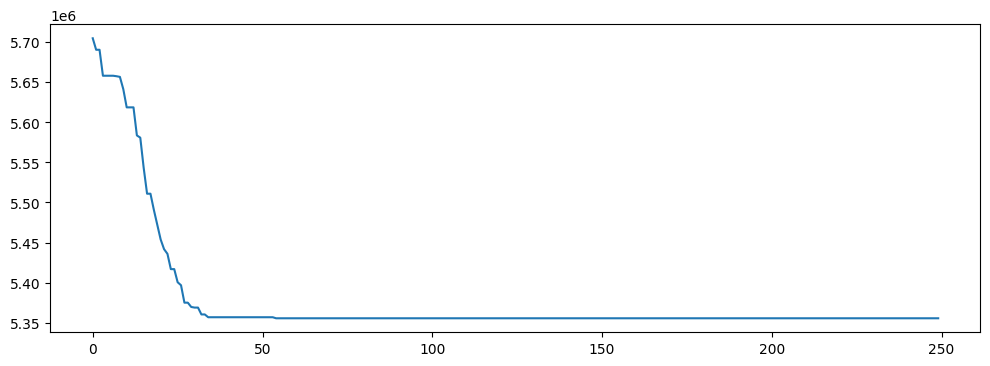

In [28]:
plt.figure(figsize=(12,4))
plt.plot(Q2.values)
plt.show()

In [30]:
def read_params_tai1(url):
    qap_instance_file = urllib.request.urlopen(url)

    line = qap_instance_file.readline()
    n = int(line.decode()[:-1].split()[0])
    print('Problem size: %d' % n)
    A = np.empty((n, n))
    #qap_instance_file.readline()
    for i in range(n):
        line = qap_instance_file.readline()
        A[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Flow matrix:\n', A)

    B = np.empty((n, n))
    qap_instance_file.readline()
    for i in range(n):
        print(f'line {i}')
        line = qap_instance_file.readline()
        B[i, :] = list(map(int, line.decode()[:-1].split()))
    print('Distance matrix:\n', B)
    return n,A,B

QAP_INSTANCE_URL = 'https://qaplib.mgi.polymtl.ca/data.d/tai60a.dat'
n,A,B=read_params_tai1(QAP_INSTANCE_URL)
Q3=SGA_QAP(chromosome_length=n,mutation_function=reverse_sequence_mutation,crossover_function=PMX,distance_matrix=B,flowmatrix=A)
Q3.gen_initial_population()
Q3.fit()

Problem size: 60
Flow matrix:
 [[ 0. 79. 71. ... 64. 87. 53.]
 [79.  0. 98. ... 69. 81. 99.]
 [71. 98.  0. ... 17. 24. 27.]
 ...
 [64. 69. 17. ...  0. 73. 78.]
 [87. 81. 24. ... 73.  0.  3.]
 [53. 99. 27. ... 78.  3.  0.]]
line 0
line 1
line 2
line 3
line 4
line 5
line 6
line 7
line 8
line 9
line 10
line 11
line 12
line 13
line 14
line 15
line 16
line 17
line 18
line 19
line 20
line 21
line 22
line 23
line 24
line 25
line 26
line 27
line 28
line 29
line 30
line 31
line 32
line 33
line 34
line 35
line 36
line 37
line 38
line 39
line 40
line 41
line 42
line 43
line 44
line 45
line 46
line 47
line 48
line 49
line 50
line 51
line 52
line 53
line 54
line 55
line 56
line 57
line 58
line 59
Distance matrix:
 [[ 0. 21. 95. ... 89. 76. 76.]
 [21.  0. 40. ... 11. 77. 32.]
 [95. 40.  0. ...  8. 38. 41.]
 ...
 [89. 11.  8. ...  0. 32. 56.]
 [76. 77. 38. ... 32.  0. 26.]
 [76. 32. 41. ... 56. 26.  0.]]
  0     0.37216234 8281112.00000000 8456237.70000000 8512292.00000000 42594.43051215
  1     0.68

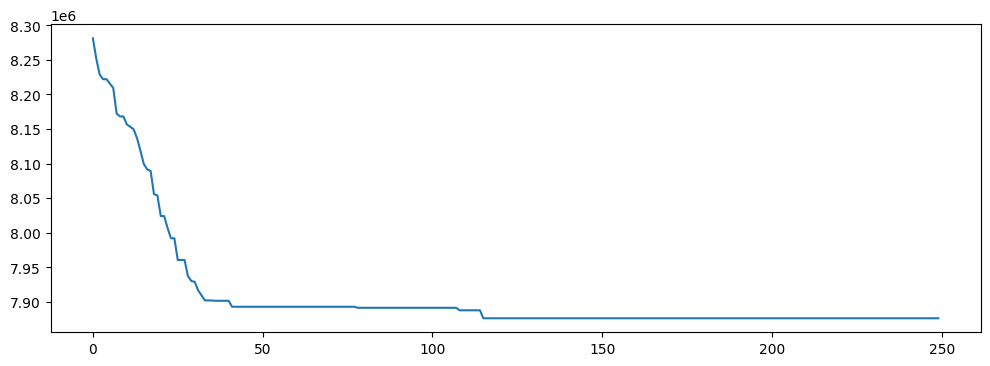

In [31]:
plt.figure(figsize=(12,4))
plt.plot(Q3.values)
plt.show()

# Old cells

In [ ]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

best_objective_value = np.Inf
best_chromosome_trans = np.zeros((1, chromosome_length))
values_trans=np.zeros(number_of_iterations)

# generating an initial population
current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
for i in range(population_size):
    current_population[i, :] = np.random.permutation(chromosome_length)

# evaluating the objective function on the current population
objective_values = np.zeros(population_size)
for i in range(population_size):
    objective_values[i] = tsp_objective_function(current_population[i, :])

for t in range(number_of_iterations):

    # selecting the parent indices by the roulette wheel method
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

    # creating the children population
    children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
    for i in range(int(number_of_offspring/2)):
        if np.random.random() < crossover_probability:
            #I'm changing the copying behaviour since it isn't in place anyway, i will just create new ndarrays in the function
            children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :], current_population[parent_indices[2*i+1], :])
        else:
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        # seen = np.zeros(len(children_population[2*i, :]), dtype=bool)
        # seen[children_population[2*i, :]] = True
        # is_permutation = np.all(seen)
        # # #checking if this maintains permutiations
        # # print(children_population[2*i, :])
        # # print(is_permutation)
        

    if np.mod(number_of_offspring, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]

    # mutating the children population
    for i in range(number_of_offspring):
        if np.random.random() < mutation_probability:
            children_population[i, :] = random_transpose_mutation(children_population[i, :])

    # evaluating the objective function on the children population
    children_objective_values = np.zeros(number_of_offspring)
    for i in range(number_of_offspring):
        children_objective_values[i] = tsp_objective_function(children_population[i, :])

    # replacing the current population by (Mu + Lambda) Replacement
    objective_values = np.hstack([objective_values, children_objective_values])
    current_population = np.vstack([current_population, children_population])

    I = np.argsort(objective_values)
    current_population = current_population[I[:population_size], :]
    objective_values = objective_values[I[:population_size]]

    # recording some statistics - the mistake was here!
    if best_objective_value > objective_values[0]:
        best_objective_value = objective_values[0]
        #czemu tu się zeruje??
        best_chromosome_trans = current_population[0, :]
        #print(best_chromosome)
    # est value in generation
    values_trans[t]=objective_values[0]
    print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

  0     0.05521417 23757.75680768 28400.04791432 29790.11065647 1079.72868923
  1     0.08631754 23757.75680768 27256.97421474 28408.93426969 923.17880887
  2     0.11430788 22477.35862455 26333.96847841 27405.33306130 909.72879929
  3     0.14168859 22477.35862455 25530.85391567 26588.37224031 848.98202118
  4     0.16945648 22335.54704194 24889.90592995 25847.51416085 774.70529982
  5     0.19799113 21590.04820240 24325.32183896 25233.89880022 720.81429455
  6     0.22856474 21552.83848093 23823.62305267 24656.49265216 675.31588154
  7     0.26519513 21365.84887981 23327.12805278 24151.78782001 649.26516836
  8     0.30530715 20477.87069734 22824.24090851 23617.49616108 601.10606870
  9     0.34251976 20052.00372521 22383.04516775 23111.76930937 549.50964324
 10     0.37729788 20052.00372521 21995.04505508 22669.69701421 526.58207391
 11     0.40643287 19035.60252623 21618.56348266 22279.15240596 531.92362369
 12     0.43565845 18573.71934283 21231.16282278 21902.49632685 543.4706026

In [ ]:
population_size = 500
chromosome_length = n
number_of_offspring = population_size
crossover_probability = 0.95
mutation_probability = 0.25
number_of_iterations = 250

time0 = time.time()

best_objective_value = np.Inf
best_chromosome = np.zeros((1, chromosome_length))
values=np.zeros(number_of_iterations)

# generating an initial population
current_population = np.zeros((population_size, chromosome_length), dtype=np.int64)
for i in range(population_size):
    current_population[i, :] = np.random.permutation(chromosome_length)

# evaluating the objective function on the current population
objective_values = np.zeros(population_size)
for i in range(population_size):
    objective_values[i] = tsp_objective_function(current_population[i, :])

for t in range(number_of_iterations):

    # selecting the parent indices by the roulette wheel method
    fitness_values = objective_values.max() - objective_values
    if fitness_values.sum() > 0:
        fitness_values = fitness_values / fitness_values.sum()
    else:
        fitness_values = np.ones(population_size) / population_size
    parent_indices = np.random.choice(population_size, number_of_offspring, True, fitness_values).astype(np.int64)

    # creating the children population
    children_population = np.zeros((number_of_offspring, chromosome_length), dtype=np.int64)
    for i in range(int(number_of_offspring/2)):
        if np.random.random() < crossover_probability:
            #I'm changing the copying behaviour since it isn't in place anyway, i will just create new ndarrays in the function
            children_population[2*i, :], children_population[2*i+1, :] = PMX(current_population[parent_indices[2*i], :], current_population[parent_indices[2*i+1], :])
        else:
            children_population[2*i, :], children_population[2*i+1, :] = current_population[parent_indices[2*i], :].copy(), current_population[parent_indices[2*i+1]].copy()
        seen = np.zeros(len(children_population[2*i, :]), dtype=bool)
        seen[children_population[2*i, :]] = True
        is_permutation = np.all(seen)
        # #checking if this maintains permutiations
        # print(children_population[2*i, :])
        # print(is_permutation)
        

    if np.mod(number_of_offspring, 2) == 1:
        children_population[-1, :] = current_population[parent_indices[-1], :]

    # mutating the children population
    for i in range(number_of_offspring):
        if np.random.random() < mutation_probability:
            children_population[i, :] = reverse_sequence_mutation(children_population[i, :])

    # evaluating the objective function on the children population
    children_objective_values = np.zeros(number_of_offspring)
    for i in range(number_of_offspring):
        children_objective_values[i] = tsp_objective_function(children_population[i, :])

    # replacing the current population by (Mu + Lambda) Replacement
    # print(current_population.shape)
    # print(children_population.shape)
    objective_values = np.hstack([objective_values, children_objective_values])
    current_population = np.vstack([current_population, children_population])
    #shape sanity check
    # print('######################')
    # print(objective_values.shape)
    # print(current_population.shape)
    # print('#################')
    I = np.argsort(objective_values)
    current_population = current_population[I[:population_size], :]
    objective_values = objective_values[I[:population_size]]
    #print(current_population)
    # recording some statistics - thr mistake was here!
    if best_objective_value > objective_values[0]:
        best_objective_value = objective_values[0]
        #czemu tu się zeruje??
        best_chromosome = current_population[0, :]
        print(best_chromosome)
    # est value in generation
    values[t]=objective_values[0]
    #print('%3d %14.8f %12.8f %12.8f %12.8f %12.8f' % (t, time.time() - time0, objective_values.min(), objective_values.mean(), objective_values.max(), objective_values.std()))

[49 21 30 43  4 14  5 27 46 37 48  7 31 33 39 12 51 10  0 40 17 34 22 45
  6 18 44 50 38 11 35 32 29  1 16 19 23 47  9 13 28  3 36 15 41 20  2 24
 42  8 26 25]
[49 21 30 35  4 14  5 27 46 37 48 11 47 33 39 12 51 13 32 40 28  1 22 45
  6 18 23  9 10  7 43  0 38 34 29 15 44 31 50  3 17 16  2 19 41 20 36 24
 42  8 26 25]
[14 47 36  3 44 42 33 30 43  5  2 18 48 38 50 35  4 45 17  6 41 31 15 23
  1 20 16 49 22 37  9 40 19 26 13 25 11 27 39 32 10 29  0  8 21 24 51 12
 46 28  7 34]
[14 50 36  3 38 43 40 34  1 21 30  6 41 44 47 35  4 45 17 18 48 31 15 23
  5 20 16 49 22 37  8  0 19 26 13 25 11 27 39 32 10 29 33  9 42 24 51 12
 46 28  7  2]
[42 46 21  4 39 33 19 26 34 45 48  0 47 37 25 12 51 10 27 13 30 23  5 50
 36 11 40 28 49 20 41 16 17 15 14  1  6  2 22 29  3 35 38  9  8 44  7 18
 43 24 32 31]
[14 47 36  3 44 42 33  0 43  5  2 18  8 10 50 23 15 31 41  6 17 45  4 35
  1 20 16 49 22 37  9 40 19 26 13 25 11 27 39 32 38 29 30 48 21 24 51 12
 46 28  7 34]
[14 47 43 33 44 42  3 34  7  5  2 18  8 

<Figure size 1200x800 with 0 Axes>

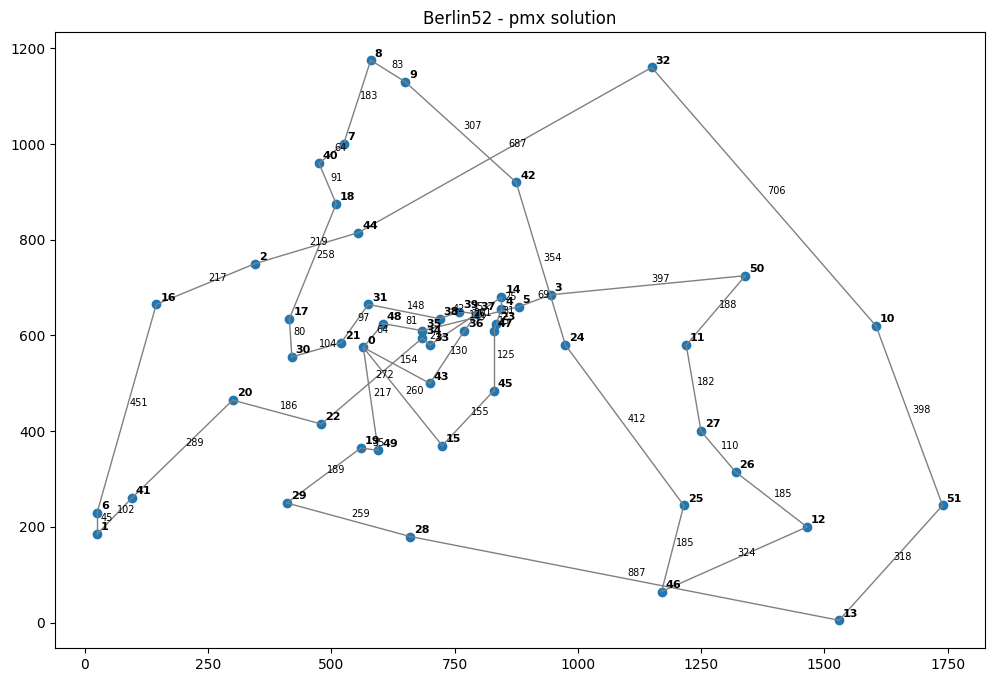

In [ ]:
from matplotlib.lines import Line2D

route = best_chromosome_trans

plt.figure(figsize=(12,8))
fig, ax = plt.subplots(figsize=(12,8))

plt.plot(coords[:, 0], coords[:, 1], 'o')

for i in range(n):
    plt.text(coords[i, 0]+8, coords[i, 1]+8, str(i), fontdict={'weight':'bold', 'size':8})

ax.add_line(Line2D(
    [coords[0, 0], coords[route[0], 0]],
    [coords[0, 1], coords[route[0], 1]],
    linewidth=1, color='gray'))
plt.text((coords[0, 0] + coords[route[0], 0])/2 + 6,
         (coords[0, 1] + coords[route[0], 1])/2 + 6,
         '%d' % A[0, route[0]], fontdict={'weight':'normal', 'size':7})
for i in range(1, len(route)):
    ax.add_line(Line2D(
        [coords[route[i-1], 0], coords[route[i], 0]],
        [coords[route[i-1], 1], coords[route[i], 1]],
        linewidth=1, color='gray'))
    plt.text((coords[route[i-1], 0] + coords[route[i], 0])/2 + 6,
             (coords[route[i-1], 1] + coords[route[i], 1])/2 + 6,
             '%d' % A[route[i-1], route[i]], fontdict={'weight':'normal', 'size':7})
ax.add_line(Line2D(
    [coords[route[-1], 0], coords[0, 0]],
    [coords[route[-1], 1], coords[0, 1]],
    linewidth=1, color='gray'))
plt.text((coords[route[-1], 0] + coords[0, 0])/2 + 6,
         (coords[route[-1], 1] + coords[0, 1])/2 + 6,
         '%d' % A[route[-1], 0], fontdict={'weight':'normal', 'size':7})

plt.title('Berlin52 - pmx + transpose solution')

plt.show()